In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis 24hs de Daytona

En este último fin de semana se corrió la edición 63 de las 24 Horas de Daytona, donde el ganador fue el Porsche Penske #7 de Nick Tandy, Felipe Nasr y Laurens Vanthoor.

En esta ocasión, utilizando los datos de Alkamel Systems, trataremos de analizar los ritmos de carrera y ver cómo estuvieron los ganadores de cada clase en este ítem.

## Importación de datos

In [10]:
race = pd.read_csv('23_Time Cards_Race.csv', delimiter=';', low_memory=False)
race.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,FLAG_AT_FL,Unnamed: 26
0,7,1,1,2:07.774,0,NaN,43.321,0,51.476,0,...,0:32.977,NaN,Marco Sorensen,NaN,GTDPRO,NaN,Heart of Racing Team,Aston Martin,GF,NaN
1,7,1,2,1:49.483,0,NaN,26.320,0,50.633,0,...,0:32.530,NaN,Marco Sorensen,NaN,GTDPRO,NaN,Heart of Racing Team,Aston Martin,GF,NaN
2,7,1,3,1:48.602,0,NaN,25.799,0,50.540,0,...,0:32.263,NaN,Marco Sorensen,NaN,GTDPRO,NaN,Heart of Racing Team,Aston Martin,GF,NaN
3,7,1,4,1:48.965,0,NaN,25.871,0,50.619,0,...,0:32.475,NaN,Marco Sorensen,NaN,GTDPRO,NaN,Heart of Racing Team,Aston Martin,GF,NaN
4,7,1,5,1:48.812,0,NaN,25.849,0,50.644,0,...,0:32.319,NaN,Marco Sorensen,NaN,GTDPRO,NaN,Heart of Racing Team,Aston Martin,GF,NaN


## Análizando los tipos de datos de cada columna del dataset

In [11]:
race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37885 entries, 0 to 37884
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   NUMBER                        37885 non-null  int64  
 1    DRIVER_NUMBER                37885 non-null  int64  
 2    LAP_NUMBER                   37885 non-null  int64  
 3    LAP_TIME                     37885 non-null  object 
 4    LAP_IMPROVEMENT              37885 non-null  int64  
 5    CROSSING_FINISH_LINE_IN_PIT  1621 non-null   object 
 6    S1                           37884 non-null  object 
 7    S1_IMPROVEMENT               37885 non-null  int64  
 8    S2                           37879 non-null  object 
 9    S2_IMPROVEMENT               37885 non-null  int64  
 10   S3                           37879 non-null  object 
 11   S3_IMPROVEMENT               37885 non-null  int64  
 12   KPH                          37885 non-null  float64
 13   

## Limpieza de datos

In [12]:
race.columns

Index(['NUMBER', ' DRIVER_NUMBER', ' LAP_NUMBER', ' LAP_TIME',
       ' LAP_IMPROVEMENT', ' CROSSING_FINISH_LINE_IN_PIT', ' S1',
       ' S1_IMPROVEMENT', ' S2', ' S2_IMPROVEMENT', ' S3', ' S3_IMPROVEMENT',
       ' KPH', ' ELAPSED', ' HOUR', 'S1_LARGE', 'S2_LARGE', 'S3_LARGE',
       'TOP_SPEED', 'DRIVER_NAME', 'PIT_TIME', 'CLASS', 'GROUP', 'TEAM',
       'MANUFACTURER', 'FLAG_AT_FL', 'Unnamed: 26'],
      dtype='object')

En el análisis anterior, vemos que existe una columna llamada Unnamed: 26 que no tiene ningún valor y no aporta nada al análisis que necesitamos. Por ende, será eliminada.

Además, vemos que el nombre de las columnas tiene espacios y eso nos dificultará a la hora de realizar los filtros, por lo que habrá una limpieza para que sean bien presentadas.

In [13]:
# Eliminando los espacios en las columnas

race.columns = race.columns.str.replace(' ', '')

race.columns

Index(['NUMBER', 'DRIVER_NUMBER', 'LAP_NUMBER', 'LAP_TIME', 'LAP_IMPROVEMENT',
       'CROSSING_FINISH_LINE_IN_PIT', 'S1', 'S1_IMPROVEMENT', 'S2',
       'S2_IMPROVEMENT', 'S3', 'S3_IMPROVEMENT', 'KPH', 'ELAPSED', 'HOUR',
       'S1_LARGE', 'S2_LARGE', 'S3_LARGE', 'TOP_SPEED', 'DRIVER_NAME',
       'PIT_TIME', 'CLASS', 'GROUP', 'TEAM', 'MANUFACTURER', 'FLAG_AT_FL',
       'Unnamed:26'],
      dtype='object')

In [14]:
# Eliminando la columna Unnamed:26

race = race.drop('Unnamed:26', axis=1)

Cuando analizamos los ritmos de carrera, debemos saber que durante la competencia hay banderas amarillas, Safety Car, entradas y salidas a los boxes. Para que sea más limpio, pocederemos a eliminarlos para que tengamos datos más limpios.  

In [26]:
race_clean = race[
(race['CROSSING_FINISH_LINE_IN_PIT'] != 'B') & (race['PIT_TIME'].isna())
& (race['FLAG_AT_FL'] == 'GF')
]


In [32]:
race_clean.sample(5)

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S2_LARGE,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER,FLAG_AT_FL
11390,24,3,501,1:38.429,0,NaN,23.975,0,45.609,0,...,0:45.609,0:28.845,NaN,Dries Vanthoor,NaN,GTP,NaN,BMW M Team RLL,BMW,GF
3908,11,2,177,1:42.196,0,NaN,24.946,0,46.843,0,...,0:46.843,0:30.407,NaN,Hunter McElrea,NaN,LMP2,NaN,TDS RACING,Gibson,GF
5595,120,2,609,1:49.060,0,NaN,25.712,0,50.908,0,...,0:50.908,0:32.440,NaN,Tom Sargent,NaN,GTD,NaN,Wright Motorsports,Porsche,GF
16351,36,2,340,1:50.013,0,NaN,25.761,0,51.212,0,...,0:51.212,0:33.040,NaN,Charlie Eastwood,NaN,GTD,NaN,DXDT Racing,Chevrolet,GF
10212,22,1,88,1:41.343,0,NaN,24.109,0,47.256,0,...,0:47.256,0:29.978,NaN,Rasmus Lindh,NaN,LMP2,NaN,United Autosports USA,Gibson,GF


Buscamos si hay algunos tiempos que no cumplan el formato minutos:segundos

In [49]:
# Valores que no cumplen con el formato esperado
invalid_lap_times = race_clean[~race_clean['LAP_TIME'].str.match(r'^\d+:\d{2}\.\d{3}$', na=False)]

# Mostrar los valores inválidos
print(invalid_lap_times['LAP_TIME'])


19187    1:24:10.147
30415    2:19:52.805
35806    1:19:26.083
Name: LAP_TIME, dtype: object


Una vez detectados, los eliminamos del dataset

In [52]:
valid_lap_times = race_clean['LAP_TIME'].str.contains(r'^\d+:\d{2}\.\d{3}$', na=False)
race_clean = race_clean[valid_lap_times]

Por último, agregaremos la columna LAP_TIME_SECONDS para transformar los tiempos que están con tipo de dato objeto a float

In [53]:
# Función que convierte objetos en segundos

def convert_to_seconds(lap_time):
    minutes, seconds = lap_time.split(':')
    total_seconds = int(minutes) * 60 + float(seconds)
    return total_seconds

# agregando la nueva columna

race_clean.loc[:,'LAP_TIME_SECONDS'] = race_clean['LAP_TIME'].apply(convert_to_seconds)


/tmp/ipykernel_447/840410386.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_clean.loc[:,'LAP_TIME_SECONDS'] = race_clean['LAP_TIME'].apply(convert_to_seconds)


In [54]:
print(race_clean[['LAP_TIME', 'LAP_TIME_SECONDS']].head())


   LAP_TIME  LAP_TIME_SECONDS
0  2:07.774           127.774
1  1:49.483           109.483
2  1:48.602           108.602
3  1:48.965           108.965
4  1:48.812           108.812


## Filtramos por clase y por coches

Ya tenemos nuestro dataset limpio. Es hora de aplicar el filtrado. En esta ocasión empezaremos por filtrar por clase: gtp, lmp2, gtdpro y gtd

In [55]:
gtp = race_clean[race_clean['CLASS'] == 'GTP']
gtpro = race_clean[race_clean['CLASS'] == 'GTDPRO']
lmp2 = race_clean[race_clean['CLASS'] == 'LMP2']
gtd = race_clean[race_clean['CLASS'] == 'GTD']

Ahora determinamos qué coches filtrar para después visualizarlos en el gráfico. En esta ocasión, elegimos aquellos que han completado las 24 horas pese a que no tengan la misma cantidad de vueltas.

![Resultados clase GTP](gtp.jpg)

![Resultados LMP2](lmp2.jpg)

![Resultados GTD Pro](gtdpro.jpg)

![Resultados GTD](gtd.jpg)

In [60]:
gtp_list = [7, 60, 6, 24, 10, 85, 25, 93, 31]
lmp2_list = [8, 22, 74,52, 18, 99, 4]
gtpro_list = [65, 3, 64, 1, 69, 81, 4, 77, 91, 29]
gtd_list = [13, 120, 27, 57, 96, 19, 50, 83, 32]

gtp_filter = gtp[gtp['NUMBER'].isin(gtp_list)]
lmp2_filter = lmp2[lmp2['NUMBER'].isin(lmp2_list)]
gtpro_filter = gtpro[gtpro['NUMBER'].isin(gtpro_list)]
gtd_filter = gtd[gtd['NUMBER'].isin(gtd_list)]

## Gráficos

Ahora graficaremos un boxplot para ver los ritmos de carrera de cada una de las clases

### GTP

In [69]:
# Ordenar los tiempos por la mediana
gtp_filter_order = (
    gtp_filter[['NUMBER', 'LAP_TIME_SECONDS']]
    .groupby(['NUMBER'])
    .median()['LAP_TIME_SECONDS']
    .sort_values()
    .index
)

In [70]:
# calculo de la diferenca entre cada uno de los gtp. Diferencia será por la mediana
medians_gtp = gtp_filter.groupby(['NUMBER'])['LAP_TIME_SECONDS'].median()
fastest_gtp = medians_gtp.idxmin()
fastest_medians_gtp = medians_gtp.min()

# calculo de las diferencias
medians_diff_gtp = medians_gtp - fastest_medians_gtp

In [71]:
# Number with Car
number_to_car_gtp = gtp_filter[['NUMBER', 'MANUFACTURER']].drop_duplicates().set_index('NUMBER')['MANUFACTURER'].to_dict()

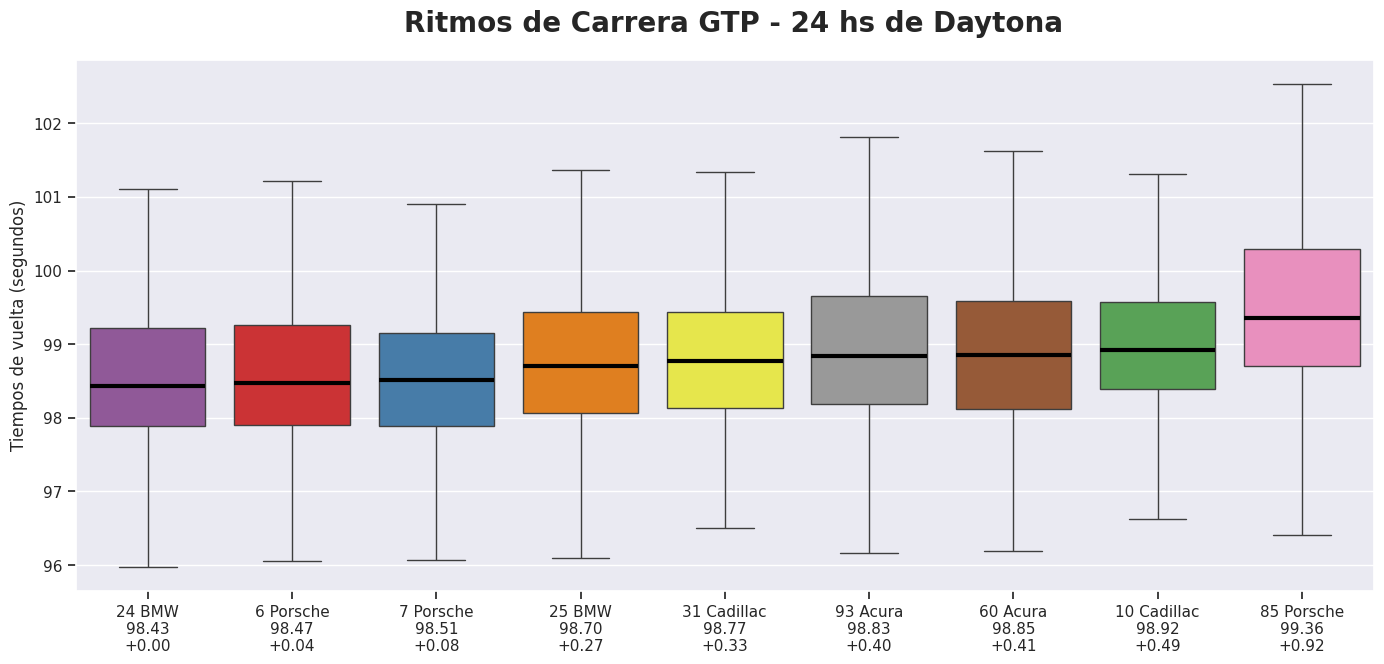

In [117]:
sns.set_style("darkgrid", rc={'xtick.bottom': True, 'ytick.left': True})  # adds seaborn style to charts, eg. grid

fig, ax = plt.subplots(figsize=(14,7))
sns.boxplot(data=gtp_filter, x='NUMBER', y='LAP_TIME_SECONDS', hue='NUMBER', legend=False,
            showfliers=False, order=gtp_filter_order, palette="Set1",
            medianprops={'color': 'black', 'linewidth': '3'}
           )
plt.xticks(
    range(len(gtp_filter_order)),
    [f"{number} {number_to_car_gtp[number]}\n{medians_gtp[number]:.2f}\n{medians_diff_gtp[number]:+.2f}" 
    for number in gtp_filter_order], rotation=0, ha='center'
)
fig.suptitle("Ritmos de Carrera GTP - 24 hs de Daytona", x=0.53, fontweight='bold', fontsize=20)

plt.tight_layout()
ax.set(xlabel=None, ylabel='Tiempos de vuelta (segundos)')
#plt.savefig('session_4_gtp', dpi=400)
plt.show()

### LMP2

In [75]:
# Ordenar los tiempos por la mediana
lmp2_filter_order = (
    lmp2_filter[['NUMBER', 'LAP_TIME_SECONDS']]
    .groupby(['NUMBER'])
    .median()['LAP_TIME_SECONDS']
    .sort_values()
    .index
)

In [76]:
# calculo de la diferenca entre cada uno de los lmp2. Diferencia será por la mediana
medians_lmp2 = lmp2_filter.groupby(['NUMBER'])['LAP_TIME_SECONDS'].median()
fastest_lmp2 = medians_lmp2.idxmin()
fastest_medians_lmp2 = medians_lmp2.min()

# calculo de las diferencias
medians_diff_lmp2 = medians_lmp2 - fastest_medians_lmp2

In [80]:
# Number with Car
number_to_car_lmp2 = lmp2_filter[['NUMBER', 'TEAM']].drop_duplicates().set_index('NUMBER')['TEAM'].to_dict()

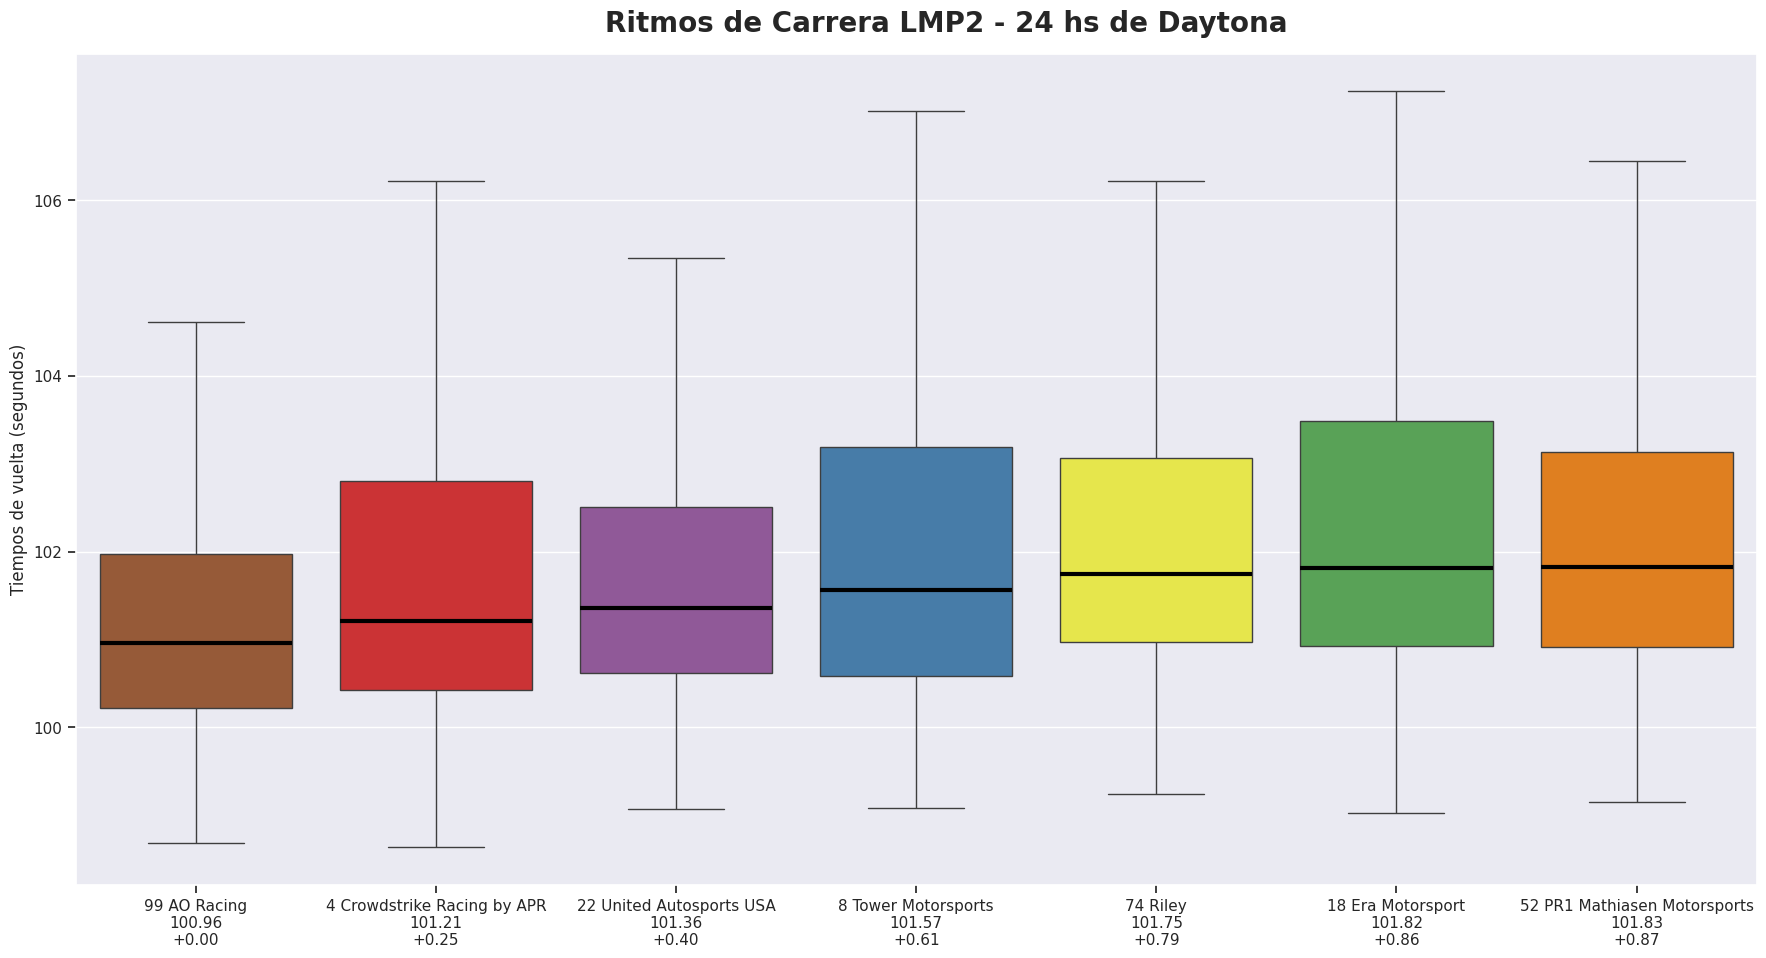

In [118]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(data=lmp2_filter, x='NUMBER', y='LAP_TIME_SECONDS', hue='NUMBER', legend=False,
            showfliers=False, order=lmp2_filter_order, palette="Set1",
            medianprops={'color': 'black', 'linewidth': '3'}
           )
plt.xticks(
    range(len(lmp2_filter_order)),
    [f"{number} {number_to_car_lmp2[number]}\n{medians_lmp2[number]:.2f}\n{medians_diff_lmp2[number]:+.2f}" 
    for number in lmp2_filter_order], rotation=0, ha='center'
)
fig.suptitle("Ritmos de Carrera LMP2 - 24 hs de Daytona", x=0.53, fontweight='bold', fontsize=20)

plt.tight_layout()
ax.set(xlabel=None, ylabel='Tiempos de vuelta (segundos)')
#plt.savefig('session_4_gtp', dpi=400)
plt.show()

### GTD Pro

In [85]:
# Ordenar los tiempos por la mediana
gtpro_filter_order = (
    gtpro_filter[['NUMBER', 'LAP_TIME_SECONDS']]
    .groupby(['NUMBER'])
    .median()['LAP_TIME_SECONDS']
    .sort_values()
    .index
)

In [86]:
# calculo de la diferenca entre cada uno de los GTD Pro. Diferencia será por la mediana
medians_gtpro = gtpro_filter.groupby(['NUMBER'])['LAP_TIME_SECONDS'].median()
fastest_gtpro = medians_gtpro.idxmin()
fastest_medians_gtpro = medians_gtpro.min()

# calculo de las diferencias
medians_diff_gtpro = medians_gtpro - fastest_medians_gtpro

In [90]:
# Number with Car
number_to_car_gtpro = gtpro_filter[['NUMBER', 'MANUFACTURER']].drop_duplicates().set_index('NUMBER')['MANUFACTURER'].to_dict()

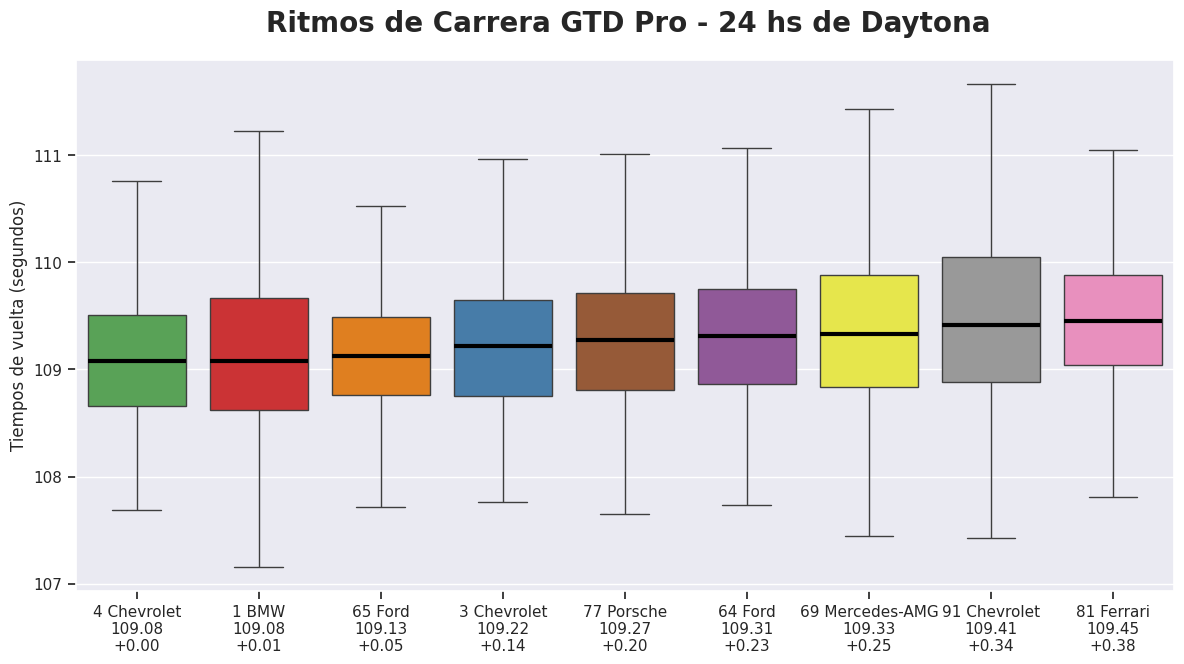

In [119]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=gtpro_filter, x='NUMBER', y='LAP_TIME_SECONDS', hue='NUMBER', legend=False,
            showfliers=False, order=gtpro_filter_order, palette="Set1",
            medianprops={'color': 'black', 'linewidth': '3'}
           )
plt.xticks(
    range(len(gtpro_filter_order)),
    [f"{number} {number_to_car_gtpro[number]}\n{medians_gtpro[number]:.2f}\n{medians_diff_gtpro[number]:+.2f}" 
    for number in gtpro_filter_order], rotation=0, ha='center'
)
fig.suptitle("Ritmos de Carrera GTD Pro - 24 hs de Daytona", x=0.53, fontweight='bold', fontsize=20)

plt.tight_layout()
ax.set(xlabel=None, ylabel='Tiempos de vuelta (segundos)')
#plt.savefig('session_4_gtp', dpi=400)
plt.show()

### GTD

In [94]:
# Ordenar los tiempos por la mediana
gtd_filter_order = (
    gtd_filter[['NUMBER', 'LAP_TIME_SECONDS']]
    .groupby(['NUMBER'])
    .median()['LAP_TIME_SECONDS']
    .sort_values()
    .index
)

In [96]:
# calculo de la diferenca entre cada uno de los GTD Pro. Diferencia será por la mediana
medians_gtd = gtd_filter.groupby(['NUMBER'])['LAP_TIME_SECONDS'].median()
fastest_gtd = medians_gtd.idxmin()
fastest_medians_gtd = medians_gtd.min()

# calculo de las diferencias
medians_diff_gtd = medians_gtd - fastest_medians_gtd

In [97]:
# Number with Car
number_to_car_gtd = gtd_filter[['NUMBER', 'MANUFACTURER']].drop_duplicates().set_index('NUMBER')['MANUFACTURER'].to_dict()

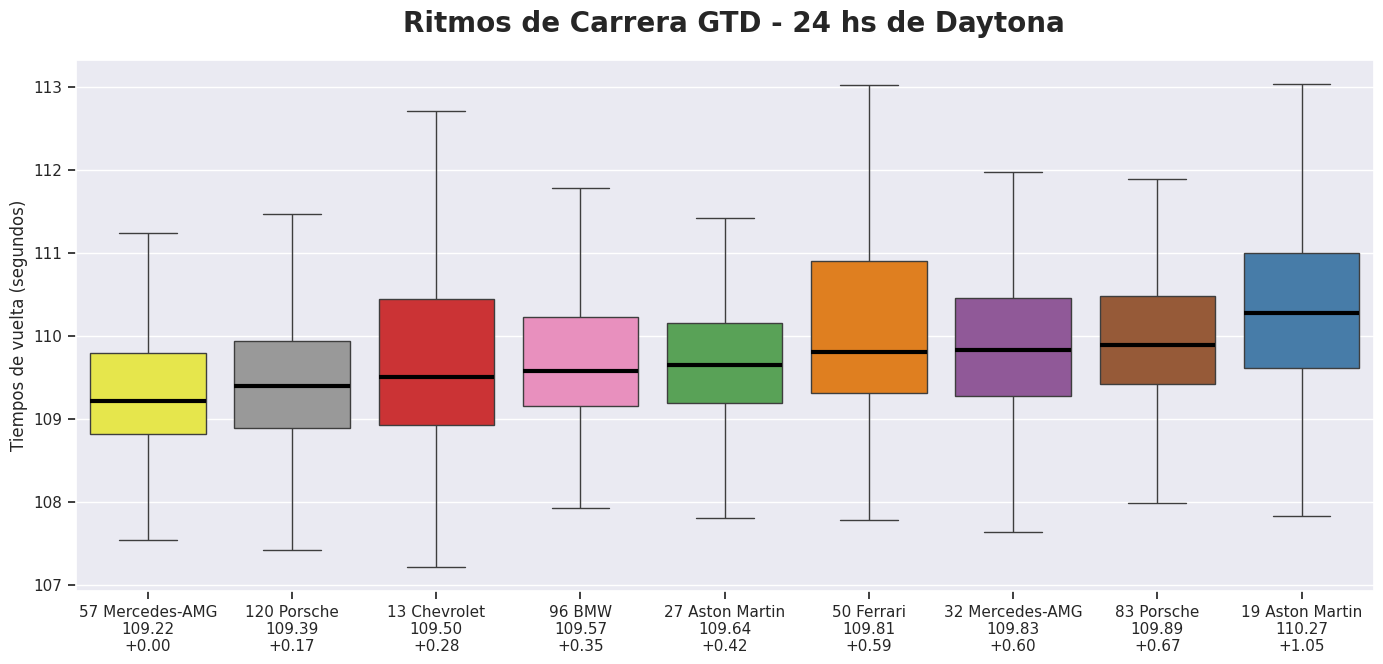

In [120]:
fig, ax = plt.subplots(figsize=(14,7))
sns.boxplot(data=gtd_filter, x='NUMBER', y='LAP_TIME_SECONDS', hue='NUMBER', legend=False,
            showfliers=False, order=gtd_filter_order, palette="Set1",
            medianprops={'color': 'black', 'linewidth': '3'}
           )
plt.xticks(
    range(len(gtd_filter_order)),
    [f"{number} {number_to_car_gtd[number]}\n{medians_gtd[number]:.2f}\n{medians_diff_gtd[number]:+.2f}" 
    for number in gtd_filter_order], rotation=0, ha='center'
)
fig.suptitle("Ritmos de Carrera GTD - 24 hs de Daytona", x=0.53, fontweight='bold', fontsize=20)

plt.tight_layout()
ax.set(xlabel=None, ylabel='Tiempos de vuelta (segundos)')
#plt.savefig('session_4_gtp', dpi=400)
plt.show()

## Resumen

El orden de los ritmos de carrera es completamente diferente a cómo se dieron los resultados. Y esto tiene lógica ya que una carrera de 24 Horas tiene muchos factores que pueden definir al ganador, por lo que se puede tener un muy buen ritmo, pero terminar perdiendo y eso es lo que pasó en esta edición.

Lo que se puede ver en los gráficos que los ganadores de cada clase fueron terceros en el ranking de ritmos y con una diferencia por debajo de las tres décimas respecto al ritmo más veloz. La excepción ocurre en los LMP2, donde el Tower Mortorsports #8 se colocó cuarto en este apartado y quedó a seis décimas del más rápido que fue el AO Racing #99.

GTD Pro y GTP fueron las clases con ritmos bastante parejos.

Los GTD tuvieron diferencias un poco más amplias y LMP2 fue la categoría cuyas distancias fueron más notorias.